# **QUESTION 1**

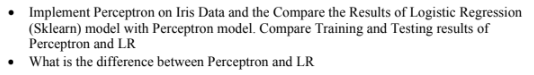

# Implement Perceptron on Iris Data and the Compare the Results

In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()
x=iris.data
y=iris.target
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import Perceptron
lr=LogisticRegression(max_iter=1000)
p=Perceptron(max_iter=1000)
lr.fit(xtrain,ytrain)
lpredtr=lr.predict(xtrain)
lpredte=lr.predict(xtest)
p.fit(xtrain, ytrain)
ppredtr=p.predict(xtrain)
ppredte=p.predict(xtest)
df3=pd.DataFrame({
    'Model': ['Logistic Regression','Perceptron'],
    'Training Accuracy': [accuracy_score(ytrain,lpredtr),accuracy_score(ytrain,lpredtr)],
    'Testing Accuracy': [accuracy_score(ytest,lpredte),accuracy_score(ytest,lpredte)]})
df3

,Model,Training Accuracy,Testing Accuracy
0,Logistic Regression,0.975,1.0
1,Perceptron,0.975,1.0


# Difference between Perceptron and Logistic Regression


A Perceptron is a simple neural network with a single layer, where it computes a weighted sum of input features and applies an activation function (usually a step function) to make a binary decision based on a threshold. It's primarily used for binary classification tasks. Logistic Regression, on the other hand, is a linear model that uses the sigmoid function to model the probability of an outcome being in one of two classes. It doesnt directly make a binary decision but instead predicts a probability, which makes it more useful when you need to understand the confidence of the classification.

# **QUESTION 2**

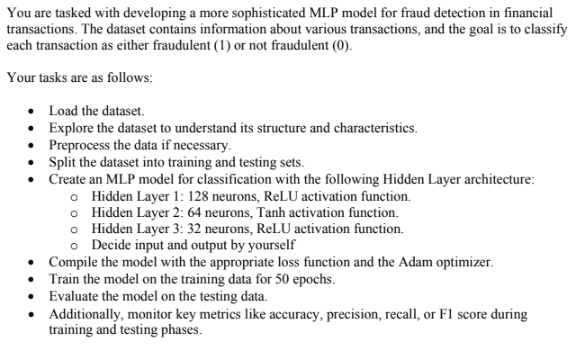

# Data Loading, Exploration, and Preprocessing

In [ ]:
fraud=pd.read_csv('Credit_Card_Fraud_Detection.csv')

In [ ]:
fraud.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
fraud.isnull().sum()

,0
Customer_ID,0
A_1,0
A_2,0
A_3,0
A_4,0
A_5,0
A_6,0
A_7,0
A_8,0
A_9,0


In [ ]:
fraud.duplicated().sum()

0

In [ ]:
fraud

,Customer_ID,A_1,A_2,A_3,A_4,A_5,A_6,A_7,A_8,A_9,A_10,A_11,A_12,A_13,A_14,class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [ ]:
fraud.describe()

,Customer_ID,A_1,A_2,A_3,A_4,A_5,A_6,A_7,A_8,A_9,A_10,A_11,A_12,A_13,A_14,class
count,6.900000e+02,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,1.569047e+07,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,7.150647e+04,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,1.556571e+07,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1.563169e+07,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.569016e+07,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.575190e+07,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.581544e+07,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


In [ ]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer_ID  690 non-null    int64  
 1   A_1          690 non-null    int64  
 2   A_2          690 non-null    float64
 3   A_3          690 non-null    float64
 4   A_4          690 non-null    int64  
 5   A_5          690 non-null    int64  
 6   A_6          690 non-null    int64  
 7   A_7          690 non-null    float64
 8   A_8          690 non-null    int64  
 9   A_9          690 non-null    int64  
 10  A_10         690 non-null    int64  
 11  A_11         690 non-null    int64  
 12  A_12         690 non-null    int64  
 13  A_13         690 non-null    int64  
 14  A_14         690 non-null    int64  
 15  class        690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


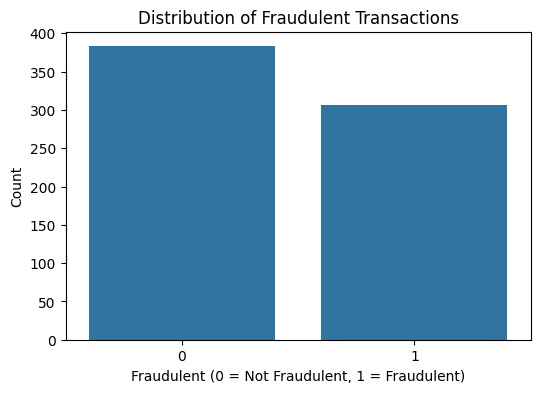

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=fraud)
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Fraudulent (0 = Not Fraudulent, 1 = Fraudulent)')
plt.ylabel('Count')
plt.show()

<Axes: >

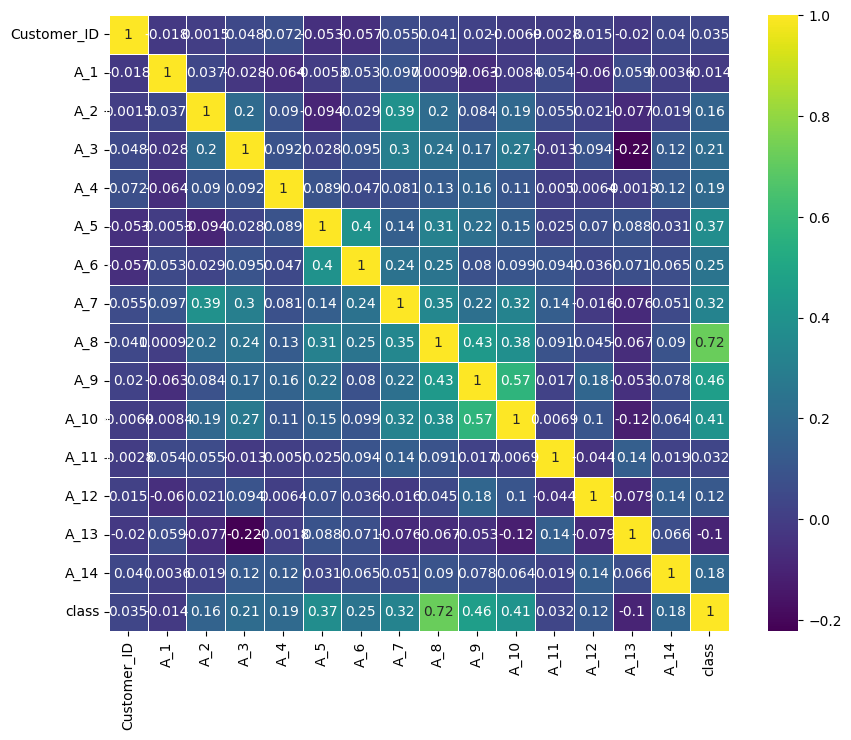

In [ ]:
corr=fraud.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr,annot=True,cmap='viridis',linewidths=0.5)

In [ ]:
x=fraud.drop('class',axis=1)
y=fraud['class']

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
x,y=smote.fit_resample(x,y)

In [ ]:
x.corrwith(y).sort_values(ascending=False)

,0
A_8,0.711865
A_9,0.406617
A_10,0.391094
A_5,0.380287
A_7,0.322642
A_6,0.241014
A_3,0.211533
A_4,0.180102
A_2,0.168953
A_14,0.163570


In [ ]:
x.drop(['A_12','Customer_ID','A_11','A_1','A_13'],axis=1,inplace=True)

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

# MLP

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Input
mlp=Sequential()
mlp.add(Input(shape=(xtrain.shape[1],)))
mlp.add(Dense(128, activation='relu'))
mlp.add(Dense(64, activation='tanh'))
mlp.add(Dense(32, activation='relu'))
mlp.add(Dense(1, activation='sigmoid'))

# Compiling MLP

In [ ]:
from keras.optimizers import Adam
mlp.compile(optimizer=Adam(),loss='binary_crossentropy',metrics=['accuracy'])

# Fitting for 50 epochs

In [ ]:
mlp.fit(xtrain,ytrain,epochs=50,batch_size=32,validation_data=(xtest,ytest))

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6336 - loss: 0.6539 - val_accuracy: 0.8571 - val_loss: 0.4266
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8388 - loss: 0.4191 - val_accuracy: 0.8701 - val_loss: 0.3268
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8558 - loss: 0.3411 - val_accuracy: 0.8701 - val_loss: 0.3167
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8521 - loss: 0.3501 - val_accuracy: 0.8831 - val_loss: 0.3167
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8938 - loss: 0.2890 - val_accuracy: 0.8831 - val_loss: 0.3149
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8706 - loss: 0.3202 - val_accuracy: 0.8831 - val_loss: 0.3211
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8827 - loss: 0.2914 - val_accuracy: 0.8831 - val_loss: 0.3195
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8828 - loss: 0.2952 - val_accuracy: 0.8831 - val_loss:

# Evaluation on Test Data

In [ ]:
loss,acc=mlp.evaluate(xtest,ytest)
print(f'Test Loss: {loss:.3f}')
print(f'Test Accuracy: {acc:.3f}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8486 - loss: 0.4092 
Test Loss: 0.446
Test Accuracy: 0.864


# Evaluating Other Metrics

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
print("Training Results")
ypredtr=mlp.predict(xtrain)
ypredtr=np.round(ypredtr)
acc=accuracy_score(ytrain,ypredtr)
print(f'Accuracy: {acc:.3f}')
prec=precision_score(ytrain,ypredtr)
print(f'Precision: {prec:.3f}')
rec=recall_score(ytrain,ypredtr)
print(f'Recall: {rec:.3f}')
f1=f1_score(ytrain,ypredtr)
print(f'F1 Score: {f1:.3f}')
print('Confusion Matrix:')
cm=confusion_matrix(ytrain,ypredtr)
print(cm)
print('-----------------------')
ypred=mlp.predict(xtest)
ypred=np.round(ypred)
print("Testing Results")
acc=accuracy_score(ytest,ypred)
print(f'Accuracy: {acc:.3f}')
prec=precision_score(ytest,ypred)
print(f'Precision: {prec:.3f}')
rec=recall_score(ytest,ypred)
print(f'Recall: {rec:.3f}')
f1=f1_score(ytest,ypred)
print(f'F1 Score: {f1:.3f}')
print('Confusion Matrix:')
cm=confusion_matrix(ytest,ypred)
print(cm)

Training Results
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step
Accuracy: 0.931
Precision: 0.915
Recall: 0.951
F1 Score: 0.933
Confusion Matrix:
[[279  27]
 [ 15 291]]
-----------------------
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Testing Results
Accuracy: 0.864
Precision: 0.878
Recall: 0.844
F1 Score: 0.861
Confusion Matrix:
[[68  9]
 [12 65]]


# **QUESTION 3**


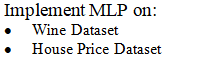

# Dataset 1

In [ ]:
wine=pd.read_csv('WineQT.csv')

In [ ]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [ ]:
print(wine.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [ ]:
wine.duplicated().sum()

0

In [ ]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [ ]:
wine.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


In [ ]:
wine['quality'] = wine['quality'] - 3

In [ ]:
x=wine.drop('quality',axis=1)
y=wine['quality']

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
x,y=smote.fit_resample(x,y)

<Axes: >

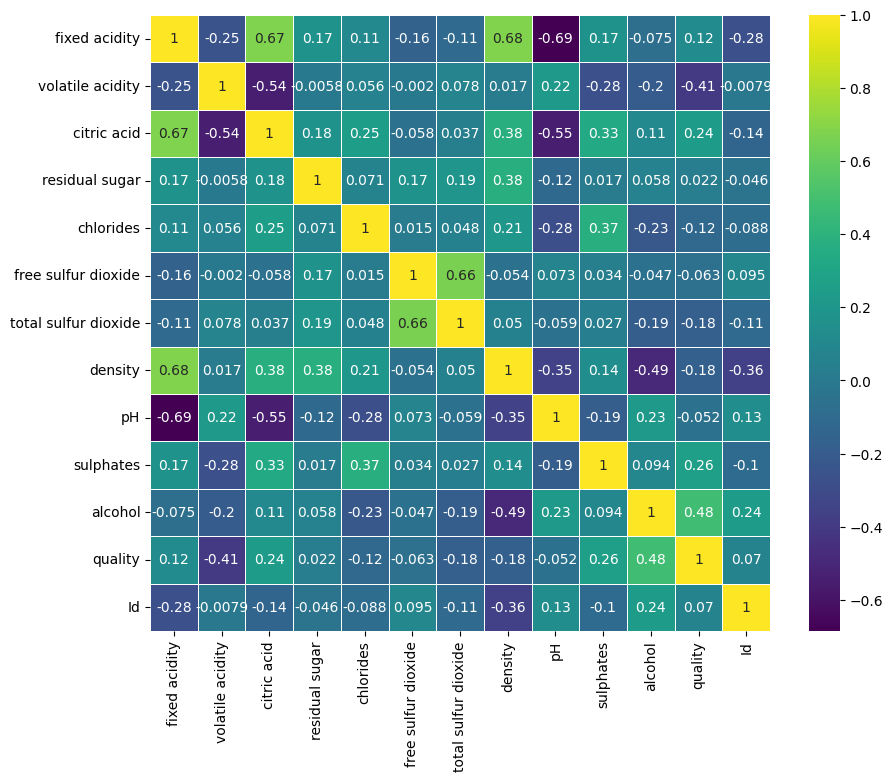

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr=wine.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr,annot=True,cmap='viridis',linewidths=0.5)

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Input
from keras.optimizers import Adam
from keras.metrics import Precision, Recall
mlp=Sequential()
mlp.add(Input(shape=(xtrain.shape[1],)))
mlp.add(Dense(128, activation='relu'))
mlp.add(Dense(64, activation='tanh'))
mlp.add(Dense(32, activation='relu'))
mlp.add(Dense(6, activation='softmax'))
mlp.compile(optimizer=Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
mlp.fit(xtrain,ytrain,epochs=50,batch_size=32,validation_data=(xtest,ytest))

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4052 - loss: 1.4753 - val_accuracy: 0.6086 - val_loss: 1.0374
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5910 - loss: 0.9770 - val_accuracy: 0.6621 - val_loss: 0.8639
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6781 - loss: 0.8347 - val_accuracy: 0.7086 - val_loss: 0.7681
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7076 - loss: 0.7447 - val_accuracy: 0.7379 - val_loss: 0.7142
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7516 - loss: 0.6648 - val_accuracy: 0.7397 - val_loss: 0.6695
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7736 - loss: 0.5942 - val_accuracy: 0.7672 - val_loss: 0.6345
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7775 - loss: 0.5751 - val_accuracy: 0.7672 - val_loss: 0.6119
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7910 - loss: 0.5594 - val_accuracy: 0.7845 - val_loss:

In [ ]:
loss,acc=mlp.evaluate(xtest,ytest)
print(f'Test Loss: {loss:.3f}')
print(f'Test Accuracy: {acc:.3f}')

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8646 - loss: 0.3680 
Test Loss: 0.469
Test Accuracy: 0.852


# Dataset 2

In [ ]:
data=pd.read_csv('data.csv')

In [ ]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['country']=le.fit_transform(data['country'])
data['street']=le.fit_transform(data['street'])
data['city']=le.fit_transform(data['city'])

In [ ]:
data['statezip']=data['statezip'].str.replace('WA ', '').astype(int)

In [ ]:
data['date']=pd.to_datetime(data['date'])
data['year']=data['date'].dt.year
data['month']=data['date'].dt.month
data['day']=data['date'].dt.day
data['weekday']=data['date'].dt.weekday

In [ ]:
data.drop(['date'],axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  street         4600 non-null   int64  
 14  city           4600 non-null   int64  
 15  statezip       4600 non-null   int64  
 16  country        4600 non-null   int64  
 17  year           4600 non-null   int32  
 18  month   

In [ ]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,yr_built,yr_renovated,street,city,statezip,country,year,month,day,weekday
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,...,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.0,4600.0,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,...,1970.786304,808.608261,2265.385870,25.674348,98079.379783,0.0,2014.0,5.757609,14.791304,2.005000
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,...,29.731848,979.414536,1307.591795,11.982721,53.142102,0.0,0.0,0.683851,8.677569,1.454154
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,...,1900.000000,0.000000,0.000000,0.000000,98001.000000,0.0,2014.0,5.000000,1.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,...,1951.000000,0.000000,1132.750000,17.000000,98033.000000,0.0,2014.0,5.000000,7.000000,1.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,...,1976.000000,0.000000,2263.500000,32.000000,98072.000000,0.0,2014.0,6.000000,14.000000,2.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,...,1997.000000,1999.000000,3400.250000,35.000000,98117.000000,0.0,2014.0,6.000000,23.000000,3.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,...,2014.000000,2014.000000,4524.000000,43.000000,98354.000000,0.0,2014.0,7.000000,31.000000,6.000000


In [ ]:
x=data.drop('price',axis=1)
y=data['price']

In [ ]:
x.corrwith(y)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,0
bedrooms,0.200336
bathrooms,0.327110
sqft_living,0.430410
sqft_lot,0.050451
floors,0.151461
waterfront,0.135648
view,0.228504
condition,0.034915
sqft_above,0.367570
sqft_basement,0.210427


In [ ]:
x.drop(['year','country'],axis=1,inplace=True)

In [ ]:
corr=x.corrwith(y).abs()
dr=corr[corr<0.02].index
x=x.drop(columns=dr)

<Axes: >

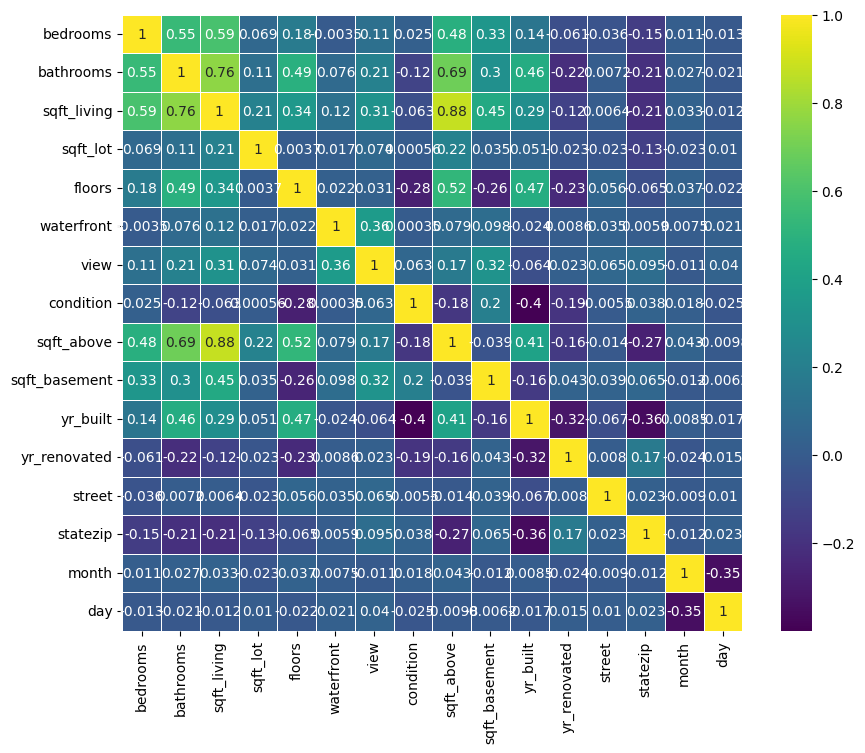

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr=x.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr,annot=True,cmap='viridis',linewidths=0.5)

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

In [ ]:
scaler=StandardScaler()
ytrain=scaler.fit_transform(ytrain.values.reshape(-1,1))
ytest=scaler.transform(ytest.values.reshape(-1,1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Input
from keras.optimizers import Adam
from keras.metrics import Precision, Recall
mlp=Sequential()
mlp.add(Input(shape=(xtrain.shape[1],)))
mlp.add(Dense(128, activation='relu'))
mlp.add(Dense(64, activation='tanh'))
mlp.add(Dense(32, activation='relu'))
mlp.add(Dense(1, activation='linear'))
mlp.compile(optimizer=Adam(),loss='mean_absolute_error')
mlp.fit(xtrain,ytrain,epochs=10,batch_size=32,validation_data=(xtest,ytest))

Epoch 1/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4862 - val_loss: 0.5398
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4034 - val_loss: 0.5318
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3880 - val_loss: 0.5366
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3850 - val_loss: 0.5291
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3802 - val_loss: 0.5306
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3812 - val_loss: 0.5294
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3706 - val_loss: 0.5373
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3803 - val_loss: 0.5267
Epoch 9/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3575 - val_loss: 0.5187
Epoch 10/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3409 - val_loss: 0.5230


In [ ]:
mae=mlp.evaluate(xtest,ytest)
print(f"Mean Absolute Error: {mae:.3f}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4446
Mean Absolute Error: 0.523
